In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [80]:
import tensorflow as tf

In [89]:
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

## Regression

In [90]:
df = pd.read_csv("./datasets/data_csv.csv")

x = df.iloc[:, 0]
y = df.iloc[:, 1]

Text(0.5, 1.0, 'Input vs. Target Variable')

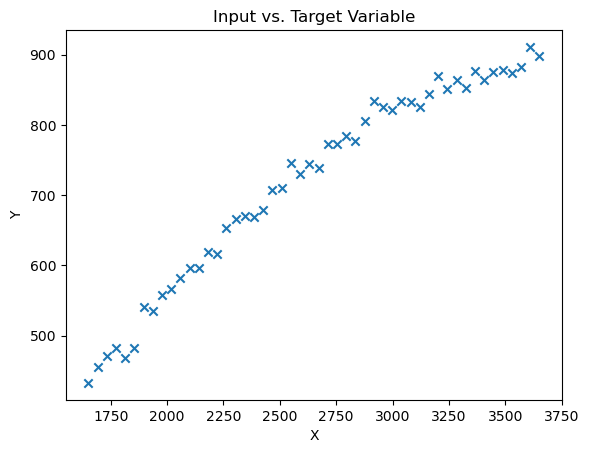

In [91]:
plt.scatter(x, y, marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input vs. Target Variable')

In [92]:
x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

## Split the dataset into training, cross validation and test sets

In [93]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)

In [94]:
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

In [95]:
del x_, y_

In [96]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


## Fit a linear model

Now we have a train, validation and test sets. We will first fit a linear model.

### Feature Scaling

In [97]:
scaler_linear = StandardScaler()

x_train_scaled = scaler_linear.fit_transform(x_train)
                                            
                                            
print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


### Train the model

Now, we will train a linear model. 

In [98]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

#### Evaluate the model on training set

In [99]:
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE: {mean_squared_error(y_train, yhat) / 2}")


training MSE: 406.18142643101237


#### Evaluate the model on validation set

In [100]:
x_cv_scaled = scaler_linear.transform(x_cv)
                                            
print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

yhat = linear_model.predict(x_cv_scaled)

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


In [101]:
print(f"validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

validation MSE: 551.7633686764407


## Adding polynomial features

In [102]:
poly = PolynomialFeatures(degree =2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)

In [103]:
scaler_poly = StandardScaler()
x_train_mapped_scaled = scaler_linear.fit_transform(x_train_mapped)

In [104]:
model = LinearRegression()
model.fit(x_train_mapped_scaled, y_train)

LinearRegression()

#### evaluate on training set

In [105]:
yhat = model.predict(x_train_mapped_scaled)

In [106]:
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

Training MSE: 49.11576307472058


#### evaluate model on validation set

In [108]:
x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled = scaler_linear.transform(x_cv_mapped)


In [109]:
yhat_cv = model.predict(x_cv_mapped_scaled)

In [110]:
print(f"Training MSE: {mean_squared_error(y_cv, yhat_cv) / 2}")

Training MSE: 87.69466438435816


It is noticable that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial. we now introduce more polynomial terms and see which one gives the best performance. 

### Implementing for higher order polynomials

In [115]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []


for degrees in range(1, 11):
    # add polynomial feature to the training set
    poly = PolynomialFeatures(degrees, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    # scale the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)

    # create and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    models.append(model)

    # compute the training MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)/ 2
    train_mses.append(train_mse)


    # add polynomioal feature and scale the cross validation set
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

    # compute cross validation MSE
    yhat_cv = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat_cv) / 2
    cv_mses.append(cv_mse)

### Plot train and validation MSE

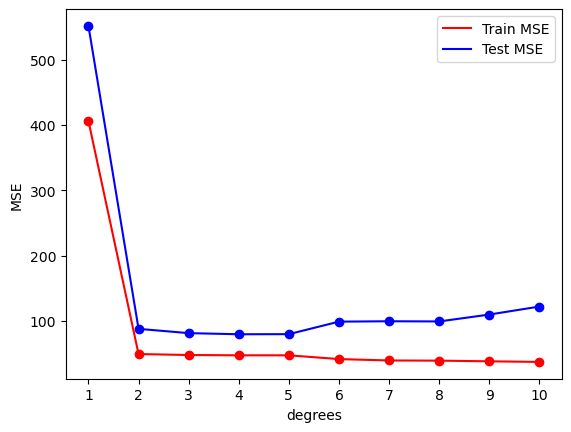

In [128]:
degrees = range(1,11)
plt.plot(degrees, train_mses, color='red', label="Train MSE")
plt.scatter(degrees, train_mses, color='red')

plt.plot(degrees, cv_mses, color='blue', label="Test MSE")
plt.scatter(degrees, cv_mses, color='blue')

plt.legend()
plt.xticks(degrees)
plt.xlabel("degrees")
plt.ylabel("MSE")

plt.show()

### Choosing the best model

When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest `cv_mse` as the one best suited for your application.

In [131]:
degree_best = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree_best}")

Lowest CV MSE is found in the model with degree=4


### Using the Test Set to Generalise

In [133]:
# Adding polynomial features to test set
x_test_mapped = polys[degree_best-1].transform(x_test)

# Scale the test set
x_test_mapped_scaled = scalers[degree_best-1].transform(x_test_mapped)


In [134]:
# predict on test set
yhat_test = models[degree_best-1].predict(x_test_mapped_scaled) 

In [135]:
# compute test MSE
test_mse = mean_squared_error(y_test, yhat_test) / 2

In [137]:
print(f"Training MSE: {train_mses[degree_best-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree_best-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.42
Test MSE: 104.64
